## Compare the last sessions of 70645, 70644 and 71343 with the rest of the deep layers / layer II (arch) recordings

Load dataset for layer2 (superficial inhibited Dave's arch mice) from hard disk. 

In [1]:
# the following two lines indicate that external functions are auto-reloaded as soon as they change. 
%load_ext autoreload
%autoreload 2
# Print statements 
from __future__ import print_function # Python 2.x

In [2]:
# General stuff:
import sys
import argparse
import os
import json
import numpy as np
import math
import psycopg2
import cPickle
import numpy as np
import pandas as pd
from datetime import date
from tqdm import tqdm_notebook

# Plotting:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib as mpl
%matplotlib inline

# External functions from subfolder /database_helpers. 
# as soon as you change something in there and press save, it will auto reload on next execution.
from database_helpers.psql_start import *
from database_helpers.create_tables import *
from database_helpers.write2tables import *
from postgres_analysis_helpers.general import *
from postgres_analysis_helpers.get_data import *

# register pickle type to retrieve binary data from database
psycopg2.extensions.register_type(psycopg2.extensions.new_type(psycopg2.BINARY.values, 'BINARY-PICKLE', cast_pickle))

Loaded analysis helpers: General
Loaded postgres_analysis_helpers -> general
Loaded postgres_analysis_helpers -> get_data


In [3]:
db_status = test_connect()
if db_status == False:
    print('Grrr... no database connection could be established.')
else:
    print('Yippiyeah! Database connection is established!')

Connecting to the PostgreSQL database...
Yippiyeah! Database connection is established!


### Make an empty dataframe and call the retrieval function

In [4]:
base_dataframe = pd.DataFrame() # create empty dataframe or feed in a base dataframe from before! 

In [5]:
psql = psql_neuroballs(base_dataframe)

55 animals across 4 experimenters found!
Total # of 5490 sessions (unique clusters: 11048)


In [6]:
psql.retrieve_data()

In [7]:
base_dataframe = psql.data()

In [8]:
len(base_dataframe)

0

In [9]:
# if you want to save
export_path_pickle  = r"C:\work\python\klusta_analysis\postgres_notebooks\export_dataframes"
export_path_pickle = "/".join(export_path_pickle.split("\\"))
#base_dataframe.to_pickle(export_path_pickle + "/70645_70644_71343.pkl")

In [10]:
deep_layer_confirmed = pd.read_pickle(export_path_pickle + "/70645_70644_71343.pkl")

In [11]:
deep_layer_confirmed.head(2)

,tetrode_no,animal_id,n_drive_user,session_ts,cluster_no,session_name,masked_ratemap,informationcontent,gridstats_ellipse_3,hdpeakrate,...,phase_stats_var,rayleigh_p,spike_trig_lfp,mean_freq,spike_no,mean_wf,maxima_wf,std_wf,lfp_session,theta_freq
0,8,70645,horsto,2017-02-19 10:30:13,2,19022017s1,"[[0.00567601919074, 0.0054057056967, 0.0051521...",0.262193,13.7871,0.341274,...,3.43028,0.000474072,spike_trig_LFP_avg spike_trig_LFP_strong...,0.21266,383,"{0: [-0.00522193211488, 0.318537859008, 0.4046...","{0: 20.5483028721, 1: 51.0861618799, 2: 20.214...","{0: [12.0560039489, 11.9957714897, 11.90215456...",time eeg0 eeg1 eeg2 eeg3 eeg_...,8.76667
1,8,70644,horsto,2017-03-29 09:00:50,2,29032017s1,"[[--, --, --, --, --, --, 0.0211151713571, --,...",0.947181,22.4575,8.09462,...,5.46125,0.000291955,spike_trig_LFP_avg spike_trig_LFP_strong...,0.762698,916,"{0: [-2.01965065502, -2.97598253275, -4.481441...","{0: 33.903930131, 1: 17.6462882096, 2: 3.95305...","{0: [4.64288513865, 4.79668185163, 4.989583527...",time eeg0 eeg1 eeg2 eeg3 eeg_...,8.26667


In [12]:
deep_layer_confirmed.columns

Index([u'tetrode_no', u'animal_id', u'n_drive_user', u'session_ts',
       u'cluster_no', u'session_name', u'masked_ratemap',
       u'informationcontent', u'gridstats_ellipse_3', u'hdpeakrate',
       u'gridstats_ellipse_1', u'gridstats_ellipse_5', u'gridstats_ellipse_4',
       u'gridstats_ellipsetheta', u'numfields', u'meandirection',
       u'stabilityhalf', u'thetaindex', u'meanrate', u'coherence',
       u'peakdirection', u'gridstats_orientation_3', u'fieldmain', u'sparsity',
       u'gridscore', u'gridstats_orientation_2', u'gridstats_orientation_1',
       u'borderscore', u'peakrate', u'mvl', u'gridstats_ellipse_2',
       u'informationrate', u'meanrateoutsidefields', u'selectivity',
       u'speedscore', u'gridstats_spacing_2', u'gridstats_spacing_3',
       u'gridstats_spacing_1', u'bins_angle_center', u'tc_stats_mvl',
       u'tc_stats_mean', u'tc_stats_var', u'hist_angle_smooth', u'theta_freq',
       u'hist_isi', u'bin_edges_isi', u'isi_stats_percent_bursts',
       u'isi_

"Deep layer confirmed" contains dataset comprising 70645,70644,71343

In [13]:
deep_layer_confirmed.tail(2)

,tetrode_no,animal_id,n_drive_user,session_ts,cluster_no,session_name,masked_ratemap,informationcontent,gridstats_ellipse_3,hdpeakrate,...,phase_stats_var,rayleigh_p,spike_trig_lfp,mean_freq,spike_no,mean_wf,maxima_wf,std_wf,lfp_session,theta_freq
822,6,71343,horsto,2017-02-20 17:18:35,9,20022017s1,None,0.67897,11.1775,0.16548,...,NaN,NaN,None,NaN,NaN,None,None,None,time eeg0 eeg1 eeg2 eeg3 eeg_...,9.2
823,5,71343,horsto,2017-02-17 11:34:41,13,17022017s1,None,0.196932,9.18037,1.05454,...,NaN,NaN,None,NaN,NaN,None,None,None,time eeg0 eeg1 eeg2 eeg3 eeg_...,8.33333


In [14]:
deep_layer_confirmed.dropna(subset=['tetrode_no','cluster_no'],inplace=True)
deep_layer_confirmed.drop_duplicates(subset=['session_ts','animal_id','tetrode_no','cluster_no'],inplace=True)

In [15]:
deep_layer_confirmed.sort_values('session_ts',ascending=True, inplace=True)
deep_layer_confirmed.reset_index(drop=True,inplace=True)

(7, 10)

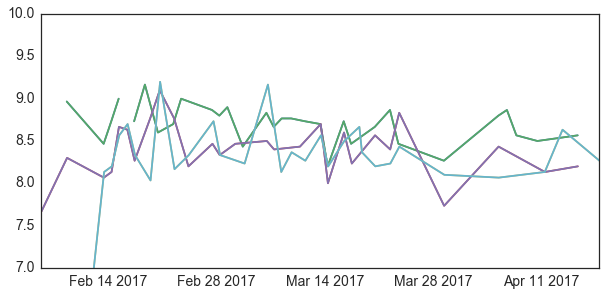

In [16]:
figure = plt.figure(figsize=(10,10),facecolor='w')
sns.set(font_scale=1.4)
sns.set_style('white')
ax1 = figure.add_subplot(2,1,1)
ax1.plot(deep_layer_confirmed.session_ts[deep_layer_confirmed.animal_id == '70644'],
         deep_layer_confirmed[deep_layer_confirmed.animal_id == '70644'].theta_freq)
ax1.plot(deep_layer_confirmed.session_ts[deep_layer_confirmed.animal_id == '70645'],
         deep_layer_confirmed[deep_layer_confirmed.animal_id == '70645'].theta_freq)
ax1.plot(deep_layer_confirmed.session_ts[deep_layer_confirmed.animal_id == '71343'],
         deep_layer_confirmed[deep_layer_confirmed.animal_id == '71343'].theta_freq)
ax1.set_ylim(7,10)

#### ts fresh

In [17]:
len(deep_layer_confirmed)

824

In [18]:
_70645_lfp = deep_layer_confirmed[deep_layer_confirmed.animal_id == '70645']
_70645_lfp.drop_duplicates(subset=['session_ts'],inplace=True) 
_70645_lfp.reset_index(drop=True,inplace=True)
_70645_lfp = _70645_lfp.iloc[-5:]


_70644_lfp = deep_layer_confirmed[deep_layer_confirmed.animal_id == '70644']
_70644_lfp.drop_duplicates(subset=['session_ts'],inplace=True) 
_70644_lfp.reset_index(drop=True,inplace=True)
_70644_lfp = _70644_lfp.iloc[-5:]

_71343_lfp = deep_layer_confirmed[deep_layer_confirmed.animal_id == '71343']
_71343_lfp.drop_duplicates(subset=['session_ts'],inplace=True) 
_71343_lfp.reset_index(drop=True,inplace=True)
_71343_lfp = _71343_lfp.iloc[-5:]

C:\Users\horsto\AppData\Local\Continuum\Miniconda2\envs\analysis\lib\site-packages\pandas\util\decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


### basic properties

In [19]:
# load superficial dataset

In [20]:
export_path_pickle  = r"C:\work\python\klusta_analysis\postgres_notebooks\export_dataframes"
export_path_pickle = "/".join(export_path_pickle.split("\\"))

In [21]:
sup_layer_bnt_scores_cells = pd.read_pickle(export_path_pickle + "/sup_layer_inhib_bnt_scores_cells.pkl")
sup_layer_autocorr_cells = pd.read_pickle(export_path_pickle + "/sup_layer_inhib_autocorr_cells.pkl")

In [22]:
len(sup_layer_bnt_scores_cells)

498

In [23]:
len(deep_layer_confirmed)

824

### take only the last 5 sessions for 70645, 70644 and 71343

In [24]:
_70645_last = deep_layer_confirmed[deep_layer_confirmed.animal_id == '70645']
_70645_last.reset_index(drop=True,inplace=True)
_70645_last = _70645_last[[x in _70645_last.session_ts.unique()[-5:] for x in _70645_last.session_ts]]
    
_70644_last = deep_layer_confirmed[deep_layer_confirmed.animal_id == '70644']
_70644_last.reset_index(drop=True,inplace=True)
_70644_last = _70644_last[[x in _70644_last.session_ts.unique()[-5:] for x in _70644_last.session_ts]]

_71343_last = deep_layer_confirmed[deep_layer_confirmed.animal_id == '71343']
_71343_last.reset_index(drop=True,inplace=True)
_71343_last = _71343_last[[x in _71343_last.session_ts.unique()[-5:] for x in _71343_last.session_ts]]

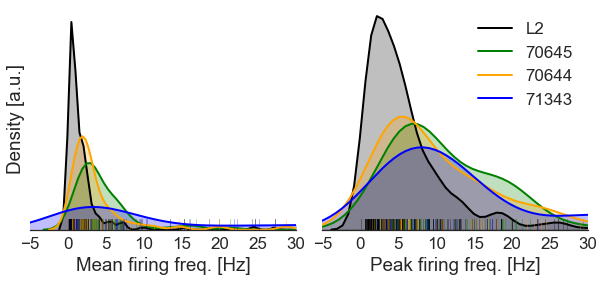

In [25]:
sns.set(font_scale=1.7)
sns.set_style('white')
sns.set_palette('Set1')
figure = plt.figure(figsize=(10,4))
ax = figure.add_subplot(1,2,1)

ax = sns.kdeplot(sup_layer_bnt_scores_cells.meanrate.dropna(), 
                 shade=True,label='L2',lw=2,color='black')
ax = sns.rugplot(sup_layer_bnt_scores_cells.meanrate.dropna(),lw=1,color='black',alpha=.3)


ax = sns.kdeplot(_70645_last.meanrate.dropna(), shade=True,label='70645',lw=2,color='green')
ax = sns.rugplot(_70645_last.meanrate.dropna(),lw=1,color='green',alpha=.3)

ax = sns.kdeplot(_70644_last.meanrate.dropna(), shade=True, label='70644',lw=2,color='orange')
ax = sns.rugplot(_70644_last.meanrate.dropna(),lw=1,color='orange',alpha=.3)

ax = sns.kdeplot(_71343_last.meanrate.dropna(), shade=True, label='71343',lw=2,color='blue')
ax = sns.rugplot(_71343_last.meanrate.dropna(),lw=1,color='blue',alpha=.3)

ax.set_xlabel('Mean firing freq. [Hz]')
ax.set_ylabel('Density [a.u.]')
ax.set_xlim(-5,30)
ax.get_yaxis().set_ticks([])
ax.legend_.remove()

ax = figure.add_subplot(1,2,2)
ax = sns.kdeplot(sup_layer_bnt_scores_cells.peakrate.dropna(), 
                 shade=True,label='L2',lw=2,color='black')
ax = sns.rugplot(sup_layer_bnt_scores_cells.peakrate.dropna(),lw=1,color='black',alpha=.3)



ax = sns.kdeplot(_70645_last.peakrate.dropna(), shade=True,label='70645',lw=2,color='green')
ax = sns.rugplot(_70645_last.peakrate.dropna(),lw=1,color='green',alpha=.3)

ax = sns.kdeplot(_70644_last.peakrate.dropna(), shade=True, label='70644',lw=2,color='orange')
ax = sns.rugplot(_70644_last.peakrate.dropna(),lw=1,color='orange',alpha=.3)

ax = sns.kdeplot(_71343_last.peakrate.dropna(), shade=True, label='71343',lw=2,color='blue')
ax = sns.rugplot(_71343_last.peakrate.dropna(),lw=1,color='blue',alpha=.3)


ax.set_xlabel('Peak firing freq. [Hz]')
ax.set_xlim(-5,30)
ax.get_yaxis().set_ticks([])

figure.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)

sns.despine(left=True)

In [26]:
# gridscore ... 


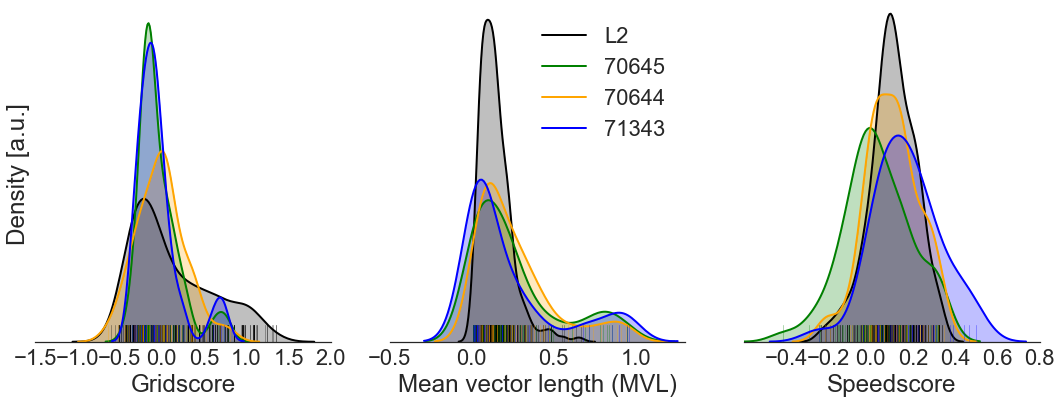

In [27]:
sns.set(font_scale=2.2)
sns.set_style('white')
sns.set_palette('Set1')
figure = plt.figure(figsize=(18,6))
ax = figure.add_subplot(1,3,1)

ax = sns.kdeplot(sup_layer_bnt_scores_cells.gridscore.dropna(), 
                 shade=True,label='L2',lw=2,color='black')
ax = sns.rugplot(sup_layer_bnt_scores_cells.gridscore.dropna(),lw=1,color='black',alpha=.3)


ax = sns.kdeplot(_70645_last.gridscore.dropna(), shade=True,label='70645',lw=2,color='green')
ax = sns.rugplot(_70645_last.gridscore.dropna(),lw=1,color='green',alpha=.3)

ax = sns.kdeplot(_70644_last.gridscore.dropna(), shade=True, label='70644',lw=2,color='orange')
ax = sns.rugplot(_70644_last.gridscore.dropna(),lw=1,color='orange',alpha=.3)

ax = sns.kdeplot(_71343_last.gridscore.dropna(), shade=True, label='71343',lw=2,color='blue')
ax = sns.rugplot(_71343_last.gridscore.dropna(),lw=1,color='blue',alpha=.3)


ax.legend_.remove()

ax.set_xlabel('Gridscore')
ax.set_ylabel('Density [a.u.]')
ax.get_yaxis().set_ticks([])

ax = figure.add_subplot(1,3,2)

ax = sns.kdeplot(sup_layer_bnt_scores_cells.mvl.dropna(), 
                 shade=True,label='L2',lw=2,color='black')
ax = sns.rugplot(sup_layer_bnt_scores_cells.mvl.dropna(),lw=1,color='black',alpha=.3)


ax = sns.kdeplot(_70645_last.mvl.dropna(), shade=True,label='70645',lw=2,color='green')
ax = sns.rugplot(_70645_last.mvl.dropna(),lw=1,color='green',alpha=.3)

ax = sns.kdeplot(_70644_last.mvl.dropna(), shade=True, label='70644',lw=2,color='orange')
ax = sns.rugplot(_70644_last.mvl.dropna(),lw=1,color='orange',alpha=.3)

ax = sns.kdeplot(_71343_last.mvl.dropna(), shade=True, label='71343',lw=2,color='blue')
ax = sns.rugplot(_71343_last.mvl.dropna(),lw=1,color='blue',alpha=.3)


ax.set_xlabel('Mean vector length (MVL)')
ax.set_xlim(-0.5,1.3)
ax.get_yaxis().set_ticks([])
figure.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)
ax.legend_.remove()
ax.legend(loc=1)

ax = figure.add_subplot(1,3,3)
ax = sns.kdeplot(sup_layer_bnt_scores_cells.speedscore.dropna(), 
                 shade=True,label='L2',lw=2,color='black')
ax = sns.rugplot(sup_layer_bnt_scores_cells.speedscore.dropna(),lw=1,color='black',alpha=.3)


ax = sns.kdeplot(_70645_last.speedscore.dropna(), shade=True,label='70645',lw=2,color='green')
ax = sns.rugplot(_70645_last.speedscore.dropna(),lw=1,color='green',alpha=.3)

ax = sns.kdeplot(_70644_last.speedscore.dropna(), shade=True, label='70644',lw=2,color='orange')
ax = sns.rugplot(_70644_last.speedscore.dropna(),lw=1,color='orange',alpha=.3)

ax = sns.kdeplot(_71343_last.speedscore.dropna(), shade=True, label='71343',lw=2,color='blue')
ax = sns.rugplot(_71343_last.speedscore.dropna(),lw=1,color='blue',alpha=.3)

ax.set_xlabel('Speedscore')
ax.get_yaxis().set_ticks([])
ax.set_xlim((-.6,.8))
figure.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
ax.legend_.remove()

sns.despine(left=True)

In [28]:
# autocorr indices

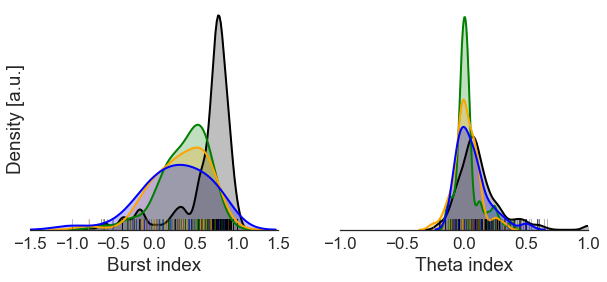

In [29]:
sns.set(font_scale=1.7)
sns.set_style('white')
sns.set_palette('Set1')
figure = plt.figure(figsize=(10,4))
ax = figure.add_subplot(1,2,1)

ax = sns.kdeplot(sup_layer_autocorr_cells.burst_idx1.dropna(), 
                 shade=True,label='L2',lw=2,color='black')
ax = sns.rugplot(sup_layer_autocorr_cells.burst_idx1.dropna(),lw=1,color='black',alpha=.3)


ax = sns.kdeplot(_70645_last.burst_idx1.dropna(), shade=True,label='70645',lw=2,color='green')
ax = sns.rugplot(_70645_last.burst_idx1.dropna(),lw=1,color='green',alpha=.3)

ax = sns.kdeplot(_70644_last.burst_idx1.dropna(), shade=True, label='70644',lw=2,color='orange')
ax = sns.rugplot(_70644_last.burst_idx1.dropna(),lw=1,color='orange',alpha=.3)

ax = sns.kdeplot(_71343_last.burst_idx1.dropna(), shade=True, label='71343',lw=2,color='blue')
ax = sns.rugplot(_71343_last.burst_idx1.dropna(),lw=1,color='blue',alpha=.3)


ax.set_xlabel('Burst index')
ax.set_xlim((-1.5,1.5))

ax.set_ylabel('Density [a.u.]')
ax.get_yaxis().set_ticks([])
ax.legend_.remove()

ax = figure.add_subplot(1,2,2)

ax = sns.kdeplot(sup_layer_autocorr_cells.theta_idx.dropna(), 
                 shade=True,label='L2',lw=2,color='black')
ax = sns.rugplot(sup_layer_autocorr_cells.theta_idx.dropna(),lw=1,color='black',alpha=.3)


ax = sns.kdeplot(_70645_last.theta_idx.dropna(), shade=True,label='70645',lw=2,color='green')
ax = sns.rugplot(_70645_last.theta_idx.dropna(),lw=1,color='green',alpha=.3)

ax = sns.kdeplot(_70644_last.theta_idx.dropna(), shade=True, label='70644',lw=2,color='orange')
ax = sns.rugplot(_70644_last.theta_idx.dropna(),lw=1,color='orange',alpha=.3)

ax = sns.kdeplot(_71343_last.theta_idx.dropna(), shade=True, label='71343',lw=2,color='blue')
ax = sns.rugplot(_71343_last.theta_idx.dropna(),lw=1,color='blue',alpha=.3)

ax.set_xlim((-1,1))
ax.set_xlabel('Theta index')
ax.get_yaxis().set_ticks([])
ax.legend_.remove()

figure.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=None)

sns.despine(left=True)

In [30]:
# average autocorrelograms

In [33]:
params= config()

In [34]:
autocorr_sup = pd.DataFrame()
autocorr_70645 = pd.DataFrame()
autocorr_70644 = pd.DataFrame()
autocorr_71343 = pd.DataFrame()

# superficial
for df in tqdm_notebook([sup_layer_autocorr_cells]):
    for i in tqdm_notebook(xrange(len(df))):
        c_entry = df.iloc[i]
        # retrieve the base session stats:
        # autocorr_complete_cells (st_autocorr_tb):
        sql = "SELECT st_autocorr FROM st_autocorr_tb \
              WHERE animal_id = '{}' AND cluster_no = {} AND tetrode_no = {} AND \
              session_ts = '{}' AND session_name NOT LIKE '%las%' AND session_name \
              NOT LIKE '%obj%';".format(c_entry.animal_id, c_entry.cluster_no,c_entry.tetrode_no, c_entry.session_ts)

        c_sql = pd.read_sql_query(sql, psycopg2.connect(**params), index_col=None)
        if len(c_sql) > 1: sys.exit()
        if len(c_sql) != 0: 
            # concat the new with the old dataframe:
            c_entry_T = pd.DataFrame(c_entry).T
            c_entry_T.reset_index(inplace=True,drop=True)
            c_join = pd.concat([c_entry_T,c_sql[['st_autocorr']]],axis=1) # horizontally join the two entries
            autocorr_sup = pd.concat([autocorr_sup,  c_join], axis=0) # vertically join it with the rest
        else:
            c_entry_T = pd.DataFrame(c_entry).T
            c_entry_T.reset_index(inplace=True,drop=True)
            c_entry_T['st_autocorr'] = np.nan
            autocorr_sup = pd.concat([autocorr_sup,  c_entry_T], axis=0) # vertically join it with the rest         
# _70645_last
for df in tqdm_notebook([_70645_last]):
    for i in tqdm_notebook(xrange(len(df))):
        c_entry = df.iloc[i]
        # retrieve the base session stats:
        # autocorr_complete_cells (st_autocorr_tb):
        sql = "SELECT st_autocorr FROM st_autocorr_tb \
              WHERE animal_id = '{}' AND cluster_no = {} AND tetrode_no = {} AND \
              session_ts = '{}' AND session_name NOT LIKE '%las%' AND session_name \
              NOT LIKE '%obj%';".format(c_entry.animal_id, c_entry.cluster_no,c_entry.tetrode_no, c_entry.session_ts)

        c_sql = pd.read_sql_query(sql, psycopg2.connect(**params), index_col=None)
        if len(c_sql) > 1: sys.exit()
        if len(c_sql) != 0: 
            # concat the new with the old dataframe:
            c_entry_T = pd.DataFrame(c_entry).T
            c_entry_T.reset_index(inplace=True,drop=True)
            c_join = pd.concat([c_entry_T,c_sql[['st_autocorr']]],axis=1) # horizontally join the two entries
            autocorr_70645 = pd.concat([autocorr_70645,  c_join], axis=0) # vertically join it with the rest
        else:
            c_entry_T = pd.DataFrame(c_entry).T
            c_entry_T.reset_index(inplace=True,drop=True)
            c_entry_T['st_autocorr'] = np.nan
            autocorr_70645 = pd.concat([autocorr_70645,  c_entry_T], axis=0) # vertically join it with the rest   
#_70644_last         
for df in tqdm_notebook([_70644_last]):
    for i in tqdm_notebook(xrange(len(df))):
        c_entry = df.iloc[i]
        # retrieve the base session stats:
        # autocorr_complete_cells (st_autocorr_tb):
        sql = "SELECT st_autocorr FROM st_autocorr_tb \
              WHERE animal_id = '{}' AND cluster_no = {} AND tetrode_no = {} AND \
              session_ts = '{}' AND session_name NOT LIKE '%las%' AND session_name \
              NOT LIKE '%obj%';".format(c_entry.animal_id, c_entry.cluster_no,c_entry.tetrode_no, c_entry.session_ts)

        c_sql = pd.read_sql_query(sql, psycopg2.connect(**params), index_col=None)
        if len(c_sql) > 1: sys.exit()
        if len(c_sql) != 0: 
            # concat the new with the old dataframe:
            c_entry_T = pd.DataFrame(c_entry).T
            c_entry_T.reset_index(inplace=True,drop=True)
            c_join = pd.concat([c_entry_T,c_sql[['st_autocorr']]],axis=1) # horizontally join the two entries
            autocorr_70644 = pd.concat([autocorr_70644,  c_join], axis=0) # vertically join it with the rest
        else:
            c_entry_T = pd.DataFrame(c_entry).T
            c_entry_T.reset_index(inplace=True,drop=True)
            c_entry_T['st_autocorr'] = np.nan
            autocorr_70644 = pd.concat([autocorr_70644,  c_entry_T], axis=0) # vertically join it with the rest         
#_71343_last    
for df in tqdm_notebook([_71343_last]):
    for i in tqdm_notebook(xrange(len(df))):
        c_entry = df.iloc[i]
        # retrieve the base session stats:
        # autocorr_complete_cells (st_autocorr_tb):
        sql = "SELECT st_autocorr FROM st_autocorr_tb \
              WHERE animal_id = '{}' AND cluster_no = {} AND tetrode_no = {} AND \
              session_ts = '{}' AND session_name NOT LIKE '%las%' AND session_name \
              NOT LIKE '%obj%';".format(c_entry.animal_id, c_entry.cluster_no,c_entry.tetrode_no, c_entry.session_ts)

        c_sql = pd.read_sql_query(sql, psycopg2.connect(**params), index_col=None)
        if len(c_sql) > 1: sys.exit()
        if len(c_sql) != 0: 
            # concat the new with the old dataframe:
            c_entry_T = pd.DataFrame(c_entry).T
            c_entry_T.reset_index(inplace=True,drop=True)
            c_join = pd.concat([c_entry_T,c_sql[['st_autocorr']]],axis=1) # horizontally join the two entries
            autocorr_71343 = pd.concat([autocorr_71343,  c_join], axis=0) # vertically join it with the rest
        else:
            try:
                c_entry_T = pd.DataFrame(c_entry).T
                c_entry_T.reset_index(inplace=True,drop=True)
                c_entry_T['st_autocorr'] = np.nan
                autocorr_71343 = pd.concat([autocorr_71343,  c_entry_T], axis=0) # vertically join it with the rest   
            except ValueError as err:
                print('Error!')
                continue
        
print('Finished.')

Error!

Finished.


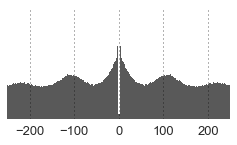

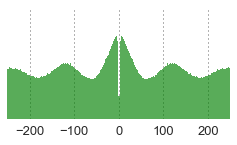

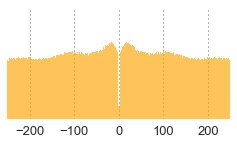

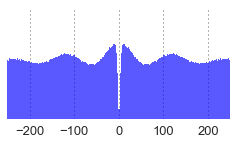

In [35]:
colors = ['black','green','orange','blue']
autocorr_sup = autocorr_sup.loc[:,~autocorr_sup.columns.duplicated()]
autocorr_70645 = autocorr_70645.loc[:,~autocorr_70645.columns.duplicated()]
autocorr_70644 = autocorr_70644.loc[:,~autocorr_70644.columns.duplicated()]
autocorr_71343 = autocorr_71343.loc[:,~autocorr_71343.columns.duplicated()]


for no,df in enumerate([autocorr_sup,autocorr_70645,autocorr_70644,autocorr_71343]):
    
    figure = plt.figure(figsize=(4,2))
    sns.set(font_scale=1.3)
    sns.set_style('white')

    ax = figure.add_subplot(1,1,1)

    ax.bar(np.arange(501) - 250, np.mean(df.st_autocorr), width=1.001, ec='none',color=colors[no],alpha=.65);
    ax.set_xlim(-250,250)
    [y1,y2] = ax.get_ylim()
    ax.set_ylim(0,1.3*y2)
    #ax.xaxis.set_visible(False)

    ax.axes.get_yaxis().set_visible(False)
    ax.grid(color='k', linestyle=':', linewidth=1,alpha=.6)

    sns.despine(left=True, bottom=True, right=True,top=True)
    plt.show()

In [36]:
# cell numbers: 
len(_70645_last)

62

In [37]:
len(_70644_last)

55

In [38]:
len(_71343_last)

37